<a href="https://colab.research.google.com/github/FatihKarabas/AI-WORKS/blob/main/KesifselVeriAnalizi__Promptlar_titanicFirstShot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Keşifsel Veri Analizi - Promptlar

# İLGİLİ KÜTÜPHANELERİ IMPORT ETME (BURADA ADIM ADIM GİDECEĞİMİZDEN İHTİYAÇ OLDUĞU AN IMPORT İŞLEMLERİ YAPILACAKTIR) VE DOSYAYI OKUMA

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import pandas as pd

# Dosyanın tam yolunu burada belirtmelisin
file_path = "/content/drive/MyDrive/Titanic-Dataset.csv"

# CSV dosyasını Pandas ile oku
df = pd.read_csv(file_path)

# VERİ SETİNE GENEL BİR BAKIŞ

In [20]:
# İlk 5 satırı göster
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
# Veri çerçevesinin genel bilgilerini göster
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [22]:
# Veri kümesinin boyutlarını göster
df.shape

(891, 12)

In [23]:
# Veri setinin temel istatistiksel özetini göster
df.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# VERİ SETİNİ YAPISAL OLARAK İNCELEME

In [24]:
# Veri setindeki sütunların veri türlerini görüntüleme
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [25]:
# Her sütundaki benzersiz değer sayısını göster
df.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


Bu çıktıya göre:
Survived ve Sex sütunları 2 farklı değer içeriyor (muhtemelen 0 ve 1 veya kadın ve erkek).
Pclass sütunu 3 farklı sınıftan oluşuyor.
PassengerId ve Name sütunları her yolcu için benzersiz




In [26]:
# Her sütunda eksik veri sayısını görüntüleme
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Bu sonuçlara göre:

Age sütununda 177 eksik değer var.
Cabin sütununda 687 eksik değer var (büyük ihtimalle çoğu yolcunun kabin numarası kaydedilmemiş).
Embarked sütununda 2 eksik değer var.
Eksik verileri temizleme veya doldurma işlemleri için ilerleyen aşamalarda uygun yöntemler kullanılabilir.

In [30]:
# Rastgele 5 satır seçme
df.sample(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
69,70,0,3,"Kink, Mr. Vincenz",male,26.0,2,0,315151,8.6625,NaN,S
491,492,0,3,"Windelov, Mr. Einar",male,21.0,0,0,SOTON/OQ 3101317,7.2500,NaN,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
627,628,1,1,"Longley, Miss. Gretchen Fiske",female,21.0,0,0,13502,77.9583,D9,S
828,829,1,3,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,367228,7.7500,NaN,Q


# VERİ SETİNDEKİ EKSİK DEĞERLERİ GÖRÜNTÜLEME

In [35]:
# Her sütundaki eksik veri sayısını hesapla
missing_values = df.isnull().sum()

# Eksik veri yüzdesini hesapla
missing_percentage = (missing_values / len(df)) * 100

# Eksik veri sayısı ve yüzdelerini tablo halinde göster
missing_data = pd.DataFrame({"Eksik Değer Sayısı": missing_values, "Eksik Veri (%)": missing_percentage})

# Sadece eksik veri içeren sütunları filtrele
missing_data = missing_data[missing_data["Eksik Değer Sayısı"] > 0]

# Eksik veri miktarlarını büyükten küçüğe sırala
missing_data.sort_values(by="Eksik Veri (%)", ascending=False)


,Eksik Değer Sayısı,Eksik Veri (%)
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


Bu tabloyu inceleyerek:

Cabin sütununun %77’sinin eksik olduğunu,
Age sütununun yaklaşık %20’sinin eksik olduğunu,
Embarked sütununun ise yalnızca 2 eksik değere sahip olduğunu görebilirsin.

# VERİ SETİNDEKİ DEĞİŞKENLER ARASINDAKİ İLİŞKİLERİ İNCELEMEK

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns


# Adım 10: "Survived" ve "Sex" Sütunlarının Dağılımını Bar Plot ile Gösterme

Bar plot, kategorik değişkenlerin dağılımını görmek için idealdir.

<ipython-input-38-7ce60348b6a2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Survived", palette="pastel")


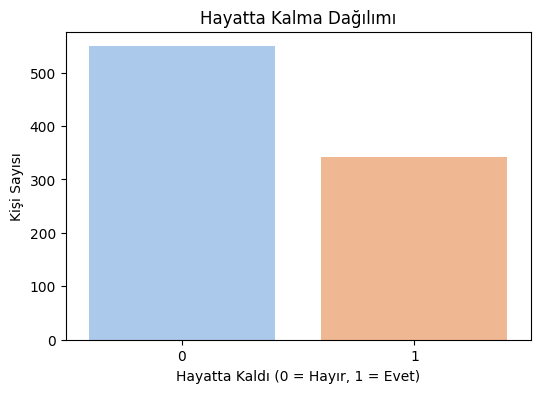

In [38]:
# "Survived" değişkeninin dağılımı
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Survived", palette="pastel")
plt.title("Hayatta Kalma Dağılımı")
plt.xlabel("Hayatta Kaldı (0 = Hayır, 1 = Evet)")
plt.ylabel("Kişi Sayısı")
plt.show()

<ipython-input-39-79e016573ee3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Sex", palette="Set2")


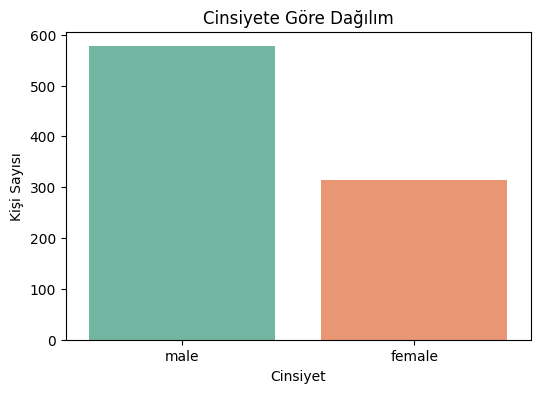

In [39]:
# "Sex" değişkeninin dağılımı
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Sex", palette="Set2")
plt.title("Cinsiyete Göre Dağılım")
plt.xlabel("Cinsiyet")
plt.ylabel("Kişi Sayısı")
plt.show()

Adım 11: "Pclass" ve "Embarked" Değişkenlerinin Dağılımlarını Bar Plot ile Gösterme

<ipython-input-40-4c3066860148>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Pclass", palette="muted")


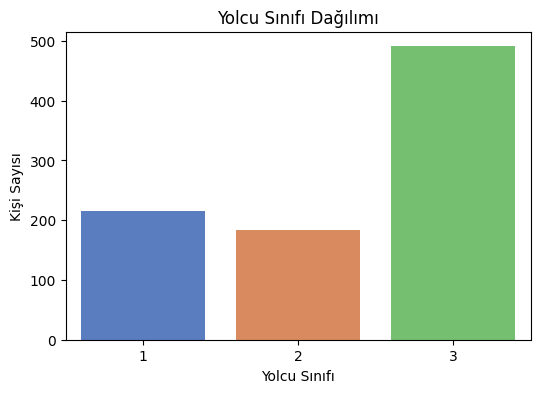

<ipython-input-40-4c3066860148>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Embarked", palette="coolwarm")


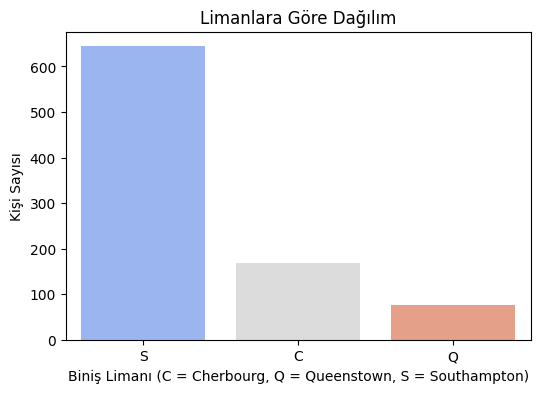

In [40]:
# "Pclass" değişkeninin dağılımı
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Pclass", palette="muted")
plt.title("Yolcu Sınıfı Dağılımı")
plt.xlabel("Yolcu Sınıfı")
plt.ylabel("Kişi Sayısı")
plt.show()

# "Embarked" değişkeninin dağılımı
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Embarked", palette="coolwarm")
plt.title("Limanlara Göre Dağılım")
plt.xlabel("Biniş Limanı (C = Cherbourg, Q = Queenstown, S = Southampton)")
plt.ylabel("Kişi Sayısı")
plt.show()


Adım 12: "SibSp" ve "Parch" Değişkenlerinin Dağılımlarını Bar Plot ile Gösterme
python
Kopyala
Düzenle


<ipython-input-41-fe338d58d3b2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="SibSp", palette="rocket")


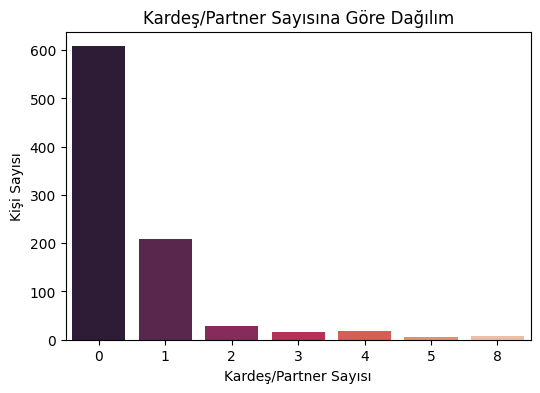

<ipython-input-41-fe338d58d3b2>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Parch", palette="magma")


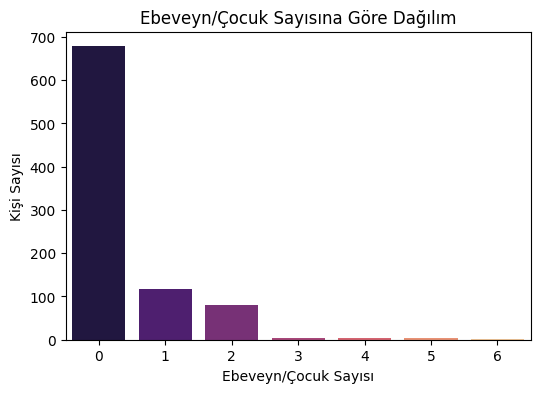

In [41]:
# "SibSp" değişkeninin dağılımı
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="SibSp", palette="rocket")
plt.title("Kardeş/Partner Sayısına Göre Dağılım")
plt.xlabel("Kardeş/Partner Sayısı")
plt.ylabel("Kişi Sayısı")
plt.show()

# "Parch" değişkeninin dağılımı
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Parch", palette="magma")
plt.title("Ebeveyn/Çocuk Sayısına Göre Dağılım")
plt.xlabel("Ebeveyn/Çocuk Sayısı")
plt.ylabel("Kişi Sayısı")
plt.show()


"Fare" ve "Age" Değişkenlerinin Dağılımlarını Histogram ile Gösterme

Histogram, sürekli değişkenlerin dağılımını görselleştirmek için kullanılır

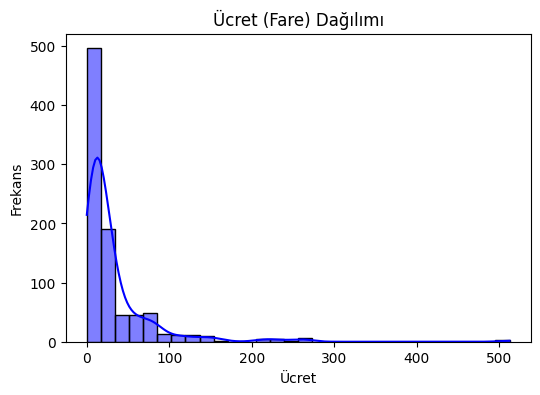

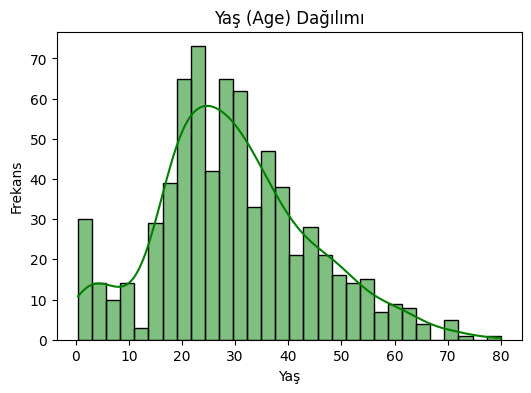

In [42]:
# "Fare" değişkeninin dağılımı
plt.figure(figsize=(6, 4))
sns.histplot(df["Fare"], bins=30, kde=True, color="blue")
plt.title("Ücret (Fare) Dağılımı")
plt.xlabel("Ücret")
plt.ylabel("Frekans")
plt.show()

# "Age" değişkeninin dağılımı
plt.figure(figsize=(6, 4))
sns.histplot(df["Age"].dropna(), bins=30, kde=True, color="green")
plt.title("Yaş (Age) Dağılımı")
plt.xlabel("Yaş")
plt.ylabel("Frekans")
plt.show()


Özet
Bu adımları tamamladıktan sonra:

Bar plotlar ile kategorik değişkenlerin (Survived, Sex, Pclass, Embarked, SibSp, Parch) dağılımlarını inceledik.
Histogramlar ile sürekli değişkenlerin (Fare, Age) dağılımlarını analiz ettik.

# **AKADEMİK ÇALIŞMALAR İÇİN DAHA PROFESYONEL GÖRSELLER**

Adım 13: "Age" ve "Survived" Sütunları için Yoğunluk Grafiği

Öncelikle, hayatta kalan ve ölen yolcuların yaş dağılımlarını aynı grafik üzerinde kıyaslayalım:

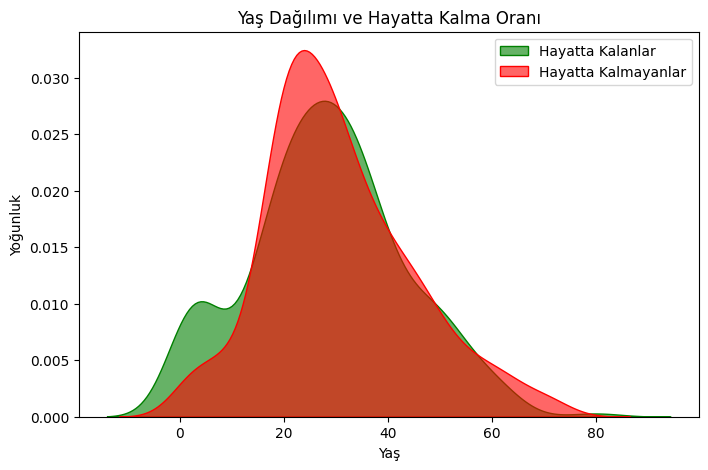

In [43]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df[df["Survived"] == 1]["Age"], fill=True, color="green", label="Hayatta Kalanlar", alpha=0.6)
sns.kdeplot(df[df["Survived"] == 0]["Age"], fill=True, color="red", label="Hayatta Kalmayanlar", alpha=0.6)

plt.title("Yaş Dağılımı ve Hayatta Kalma Oranı")
plt.xlabel("Yaş")
plt.ylabel("Yoğunluk")
plt.legend()
plt.show()


Analiz:  
Bu grafik, farklı yaş gruplarında hayatta kalma oranlarını gösterir. Yeşil alan hayatta kalanları, kırmızı alan ise hayatını kaybedenleri temsil eder. Eğer belirli yaş gruplarında belirgin farklılıklar varsa, bu grafik bunu görselleştirmeye yardımcı olur.

Adım 14: "Pclass" (Sınıf) Değişkenine Göre Yaş ve Hayatta Kalma Yoğunluk Grafiği

Farklı yolcu sınıflarına göre yaş dağılımı ve hayatta kalma oranlarını inceleyelim.

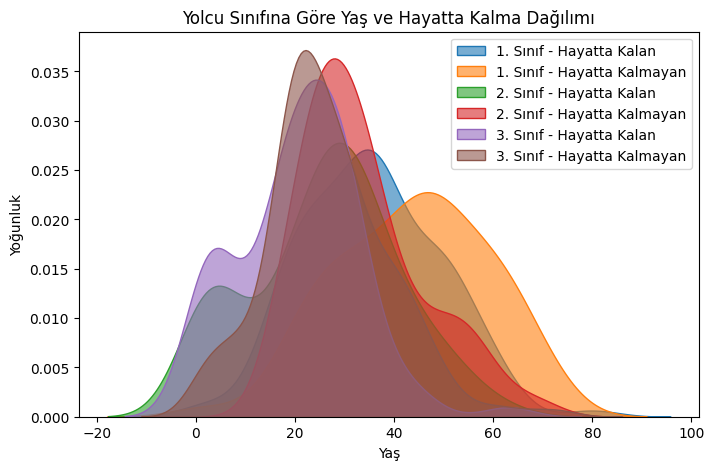

In [44]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df[(df["Survived"] == 1) & (df["Pclass"] == 1)]["Age"], fill=True, label="1. Sınıf - Hayatta Kalan", alpha=0.6)
sns.kdeplot(df[(df["Survived"] == 0) & (df["Pclass"] == 1)]["Age"], fill=True, label="1. Sınıf - Hayatta Kalmayan", alpha=0.6)

sns.kdeplot(df[(df["Survived"] == 1) & (df["Pclass"] == 2)]["Age"], fill=True, label="2. Sınıf - Hayatta Kalan", alpha=0.6)
sns.kdeplot(df[(df["Survived"] == 0) & (df["Pclass"] == 2)]["Age"], fill=True, label="2. Sınıf - Hayatta Kalmayan", alpha=0.6)

sns.kdeplot(df[(df["Survived"] == 1) & (df["Pclass"] == 3)]["Age"], fill=True, label="3. Sınıf - Hayatta Kalan", alpha=0.6)
sns.kdeplot(df[(df["Survived"] == 0) & (df["Pclass"] == 3)]["Age"], fill=True, label="3. Sınıf - Hayatta Kalmayan", alpha=0.6)

plt.title("Yolcu Sınıfına Göre Yaş ve Hayatta Kalma Dağılımı")
plt.xlabel("Yaş")
plt.ylabel("Yoğunluk")
plt.legend()
plt.show()


Analiz:   
Bu grafik, farklı sınıflardaki yolcuların yaş dağılımlarını ve hayatta kalma oranlarını gösterir. Eğer belirli bir sınıfta hayatta kalma oranı daha yüksekse, bu yoğunluk farkı olarak kendini gösterecektir.

Adım 15: Pclass'a Göre "Survived" ve "Age" Yoğunluk Grafiği

Her yolcu sınıfı için yaş dağılımlarını tek bir grafik üzerinde karşılaştıralım:

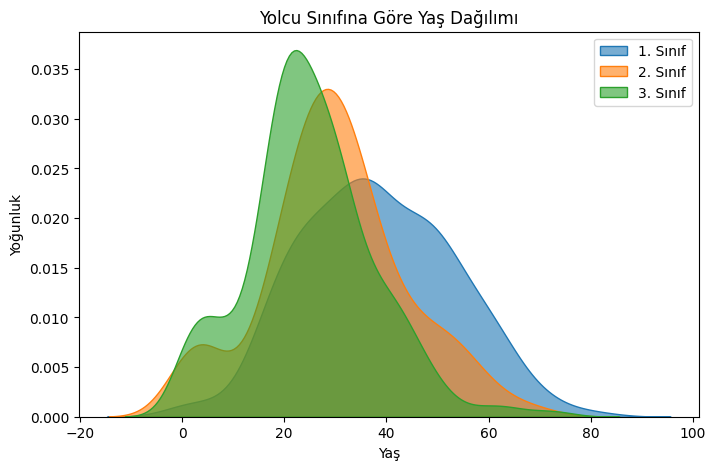

In [45]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df[df["Pclass"] == 1]["Age"], fill=True, label="1. Sınıf", alpha=0.6)
sns.kdeplot(df[df["Pclass"] == 2]["Age"], fill=True, label="2. Sınıf", alpha=0.6)
sns.kdeplot(df[df["Pclass"] == 3]["Age"], fill=True, label="3. Sınıf", alpha=0.6)

plt.title("Yolcu Sınıfına Göre Yaş Dağılımı")
plt.xlabel("Yaş")
plt.ylabel("Yoğunluk")
plt.legend()
plt.show()


Analiz:  
Bu grafik, farklı sınıftaki yolcuların yaş dağılımını göstermektedir. Özellikle 1. sınıftaki yolcuların daha yaşlı, 3. sınıftaki yolcuların ise daha genç olduğunu gözlemleyebilirsin.

Sonuç:  
Bu yoğunluk grafikleri, Titanic'teki hayatta kalma oranları ile yaş ve yolcu sınıfı arasındaki ilişkileri daha net bir şekilde ortaya koyar. Özellikle 1. sınıfta hayatta kalma oranının daha yüksek olduğunu ve genç yolcuların genel olarak hayatta kalma şanslarının daha fazla olduğunu görebilirsin.

# **KORELASYON ANALİZİ**

Korelasyon Analizi ve Isı Haritası Görselleştirme

Titanic veri setindeki sayısal değişkenler arasındaki korelasyonu analiz etmek için aşağıdaki adımları uygulayabilirsin.

Adım 16: Korelasyon Matrisi ve Isı Haritası
Öncelikle korelasyon matrisini hesaplayalım ve seaborn kütüphanesi ile bir heatmap (ısı haritası) oluşturalım.

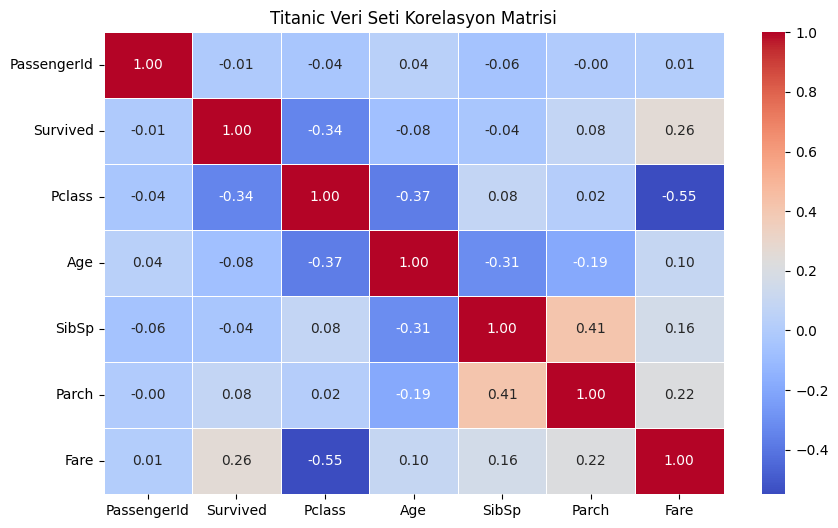

In [46]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasyon matrisini oluştur
corr_matrix = df.corr(numeric_only=True)

# Isı haritasını çiz
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Grafik başlığını ekleyelim
plt.title("Titanic Veri Seti Korelasyon Matrisi")
plt.show()


Analiz
Bu ısı haritası sayesinde:

✅ "Survived" (Hayatta Kalma) değişkeni ile en güçlü ilişkili değişkenleri belirleyebilirsin.

✅ "Fare" ve "Pclass" değişkenleri arasındaki negatif korelasyonu görebilirsin (yüksek ücret, düşük sınıf numarası ile ilişkilidir).

✅ "SibSp" ve "Parch" değişkenlerinin korelasyonu, aile bireyleriyle seyahat edenler için bilgi sağlayabilir.

Eğer korelasyonu daha sade bir şekilde incelemek istersen, belirli bir değişkenle olan korelasyonları sıralayarak en güçlü ilişkileri görebilirsin:

In [47]:
# "Survived" sütunu ile diğer değişkenler arasındaki korelasyonu büyükten küçüğe sıralayalım
corr_with_survived = corr_matrix["Survived"].sort_values(ascending=False)
print(corr_with_survived)


Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64


Bu çıktı, hayatta kalma durumuyla en güçlü ilişkili değişkenleri gösterir.

# Kategorik Veri Analizi ve **Görselleştirme**

# Adım 17: Kategorik Değişkenlerin Sıklık Analizi (value_counts)

Kategorik değişkenlerin dağılımını incelemek için value_counts() fonksiyonunu kullanabiliriz. Öncelikle Titanic veri setindeki kategorik değişkenleri belirleyelim ve her bir değişkenin kaç kez tekrarlandığını hesaplayalım

In [50]:
# Kategorik değişkenlerin listesi (object ve kategori tipindekiler)
categorical_columns = df.select_dtypes(include=["object", "category"]).columns

# Her bir kategorik değişkenin değer sayısını yazdır
for col in categorical_columns:
    print(f"\n{col} sütununun değer sayımları:")
    print(df[col].value_counts())



Name sütununun değer sayımları:
Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Name: count, Length: 891, dtype: int64

Sex sütununun değer sayımları:
Sex
male      577
female    314
Name: count, dtype: int64

Ticket sütununun değer sayımları:
Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463     

✅ Önerilen Görselleştirme Yöntemi:  
Bar grafikleri, kategorik değişkenlerin sıklığını göstermek için idealdir. Aşağıdaki kod ile bir sütun grafiği oluşturabilirsin:

<ipython-input-51-febac0e25c0c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Embarked"], palette="Set2")


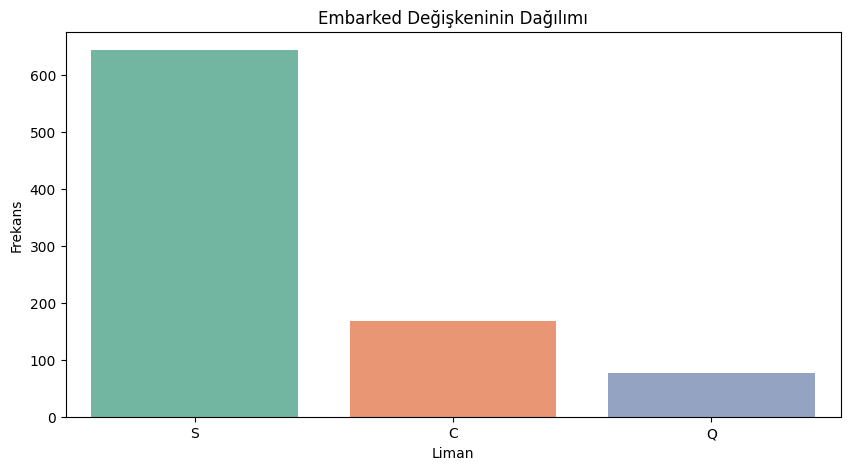

In [51]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df["Embarked"], palette="Set2")
plt.title("Embarked Değişkeninin Dağılımı")
plt.xlabel("Liman")
plt.ylabel("Frekans")
plt.show()


# Adım 18: İki Kategorik Değişken Arasındaki İlişki (pd.crosstab)

İki kategorik değişken arasındaki ilişkiyi incelemek için pd.crosstab() fonksiyonunu kullanabiliriz.

Örneğin, cinsiyet ("Sex") ve hayatta kalma durumu ("Survived") arasındaki ilişkiyi inceleyelim

In [52]:
# Cinsiyet ve Hayatta Kalma arasındaki ilişki
crosstab_result = pd.crosstab(df["Sex"], df["Survived"])
print(crosstab_result)


Survived    0    1
Sex               
female     81  233
male      468  109


✅ Önerilen Görselleştirme Yöntemi:  
Bir istikrarlı karşılaştırma için yüzde bazlı bar grafiği kullanılabilir:

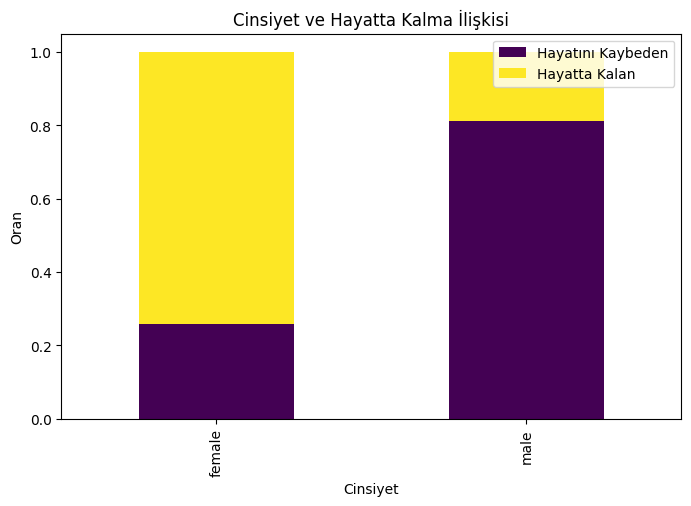

In [53]:
crosstab_result_norm = crosstab_result.div(crosstab_result.sum(1), axis=0)  # Yüzdelik dönüşüm

crosstab_result_norm.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="viridis")
plt.title("Cinsiyet ve Hayatta Kalma İlişkisi")
plt.xlabel("Cinsiyet")
plt.ylabel("Oran")
plt.legend(["Hayatını Kaybeden", "Hayatta Kalan"])
plt.show()


Bu grafik, cinsiyetin hayatta kalma oranı üzerindeki etkisini yüzdelik olarak gösterir.

# Adım 19: Kategorik Değişkenlerin Görselleştirilmesi (sns.countplot, sns.barplot)

Kategorik değişkenlerin dağılımını analiz etmek için sns.countplot() fonksiyonu oldukça etkilidir.   
Örneğin, Pclass (Bilet Sınıfı) ve Survived değişkenlerini inceleyelim:

<ipython-input-54-cb66f04cd870>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Pclass", data=df, palette="coolwarm")


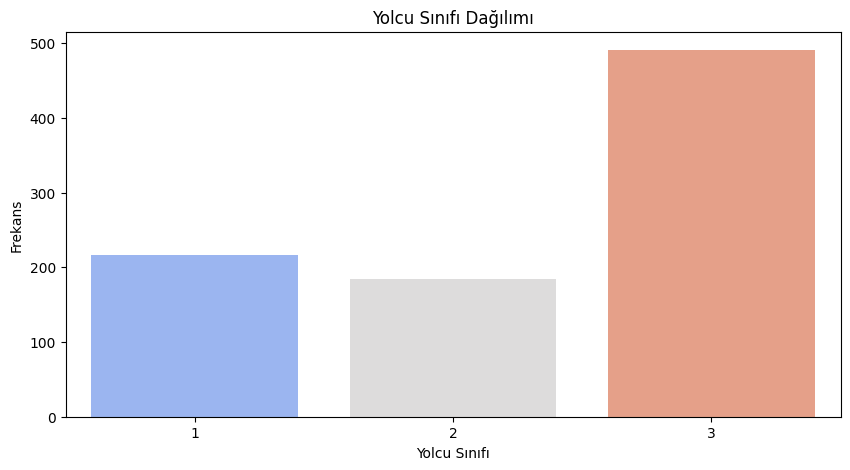

In [54]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Pclass", data=df, palette="coolwarm")
plt.title("Yolcu Sınıfı Dağılımı")
plt.xlabel("Yolcu Sınıfı")
plt.ylabel("Frekans")
plt.show()


Bar Plot Kullanımı:      
Eğer ortalamaları kıyaslamak istersen sns.barplot() kullanılabilir.   
Örneğin, sınıf bazında hayatta kalma oranlarını inceleyelim:

<ipython-input-55-8626a451df04>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Pclass", y="Survived", data=df, palette="Blues")


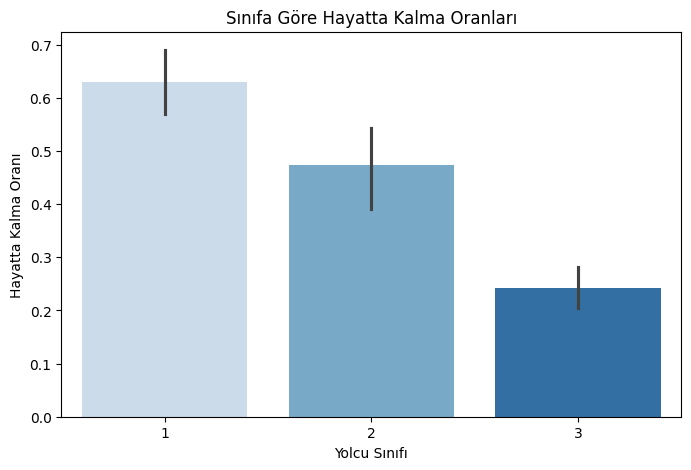

In [55]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Pclass", y="Survived", data=df, palette="Blues")
plt.title("Sınıfa Göre Hayatta Kalma Oranları")
plt.xlabel("Yolcu Sınıfı")
plt.ylabel("Hayatta Kalma Oranı")
plt.show()

# Adım 20: Sayısal Değişkenler Arasındaki İlişkileri İnceleme (scatter_matrix, pairplot)
Birden fazla sayısal değişken arasındaki ilişkileri görselleştirmek için pairplot veya scatter_matrix kullanabiliriz.

pairplot() Kullanımı:  
Bu fonksiyon, tüm sayısal değişkenlerin birbirine göre dağılımını içeren grafikler oluşturur.

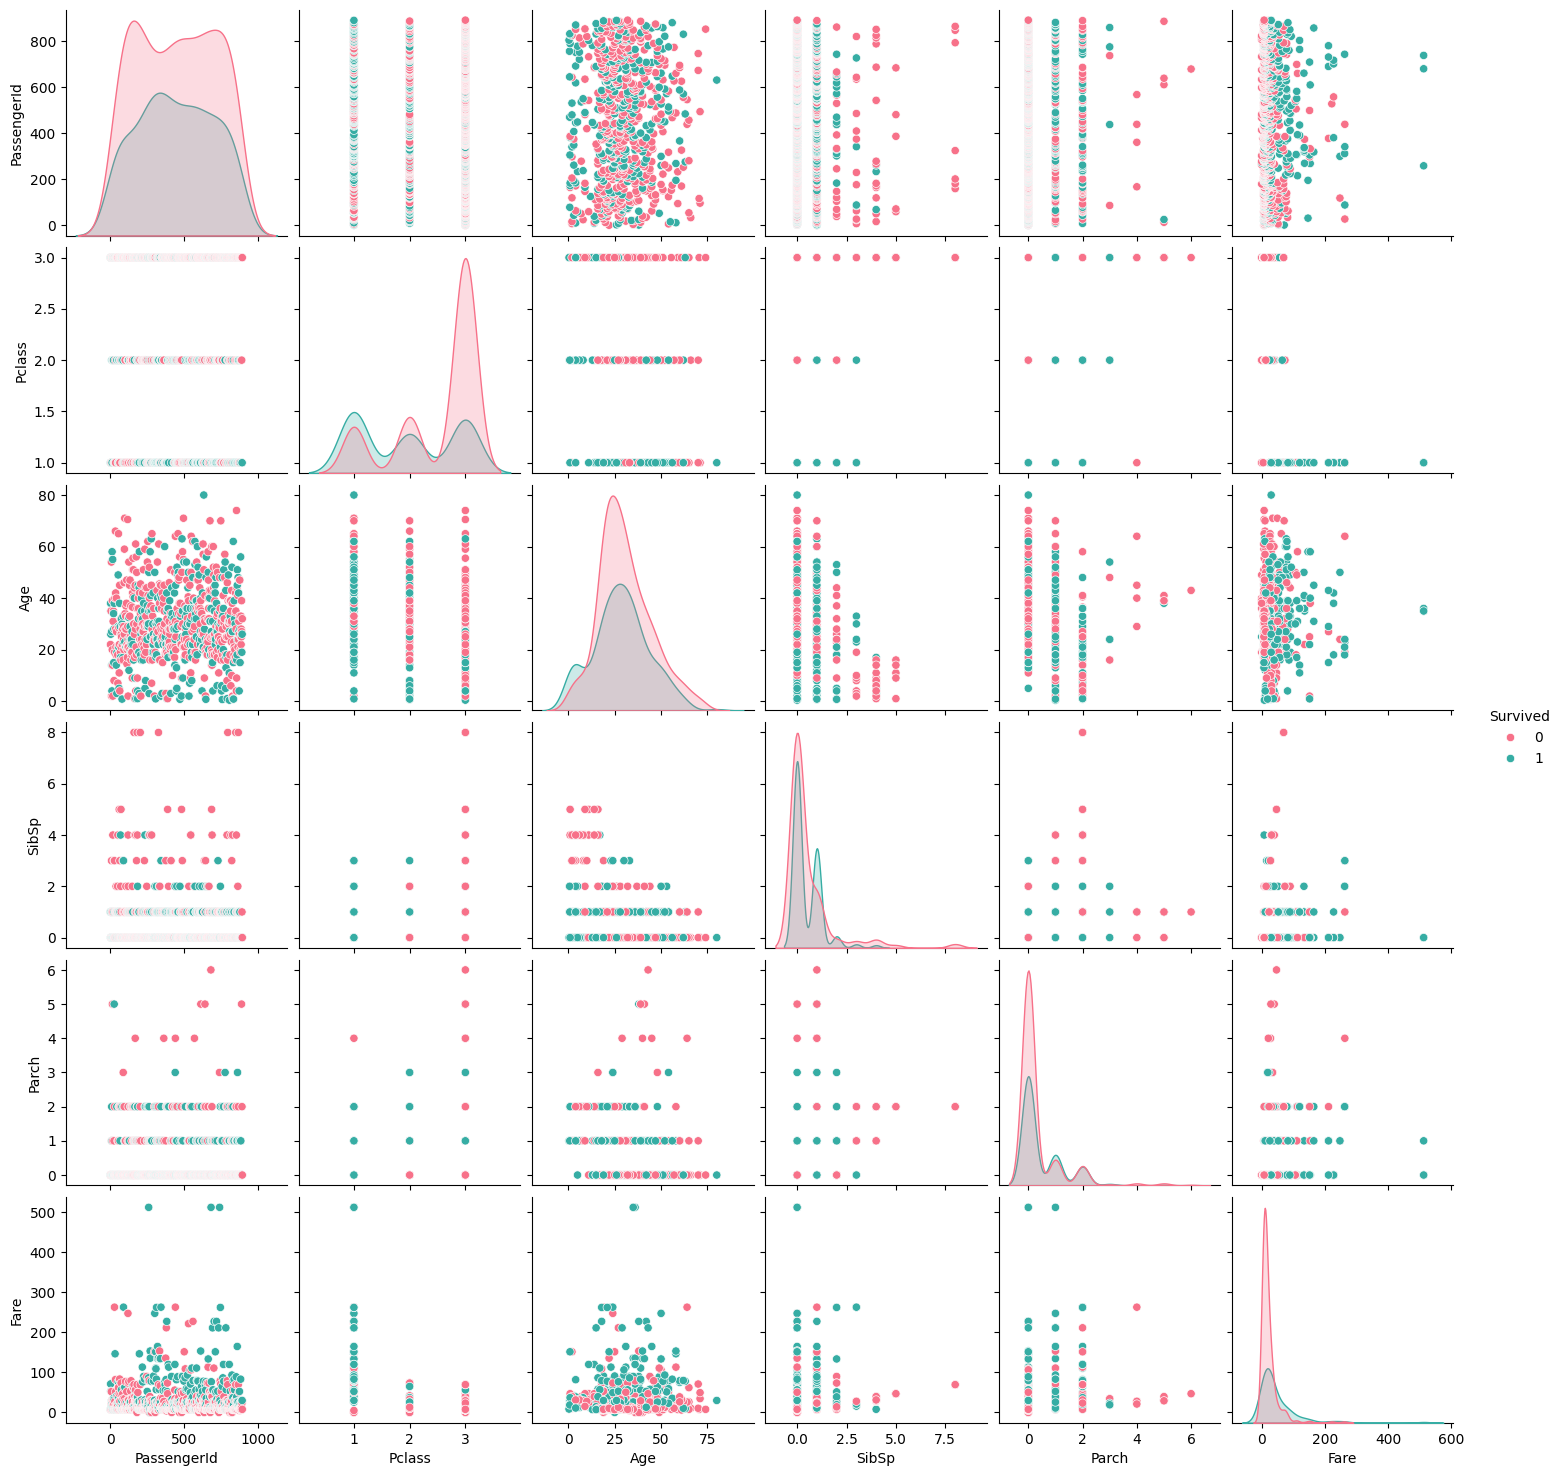

In [56]:
import seaborn as sns

sns.pairplot(df, hue="Survived", diag_kind="kde", palette="husl")
plt.show()

scatter_matrix() Kullanımı:  
scatter_matrix() fonksiyonu da benzer bir işlev görür:

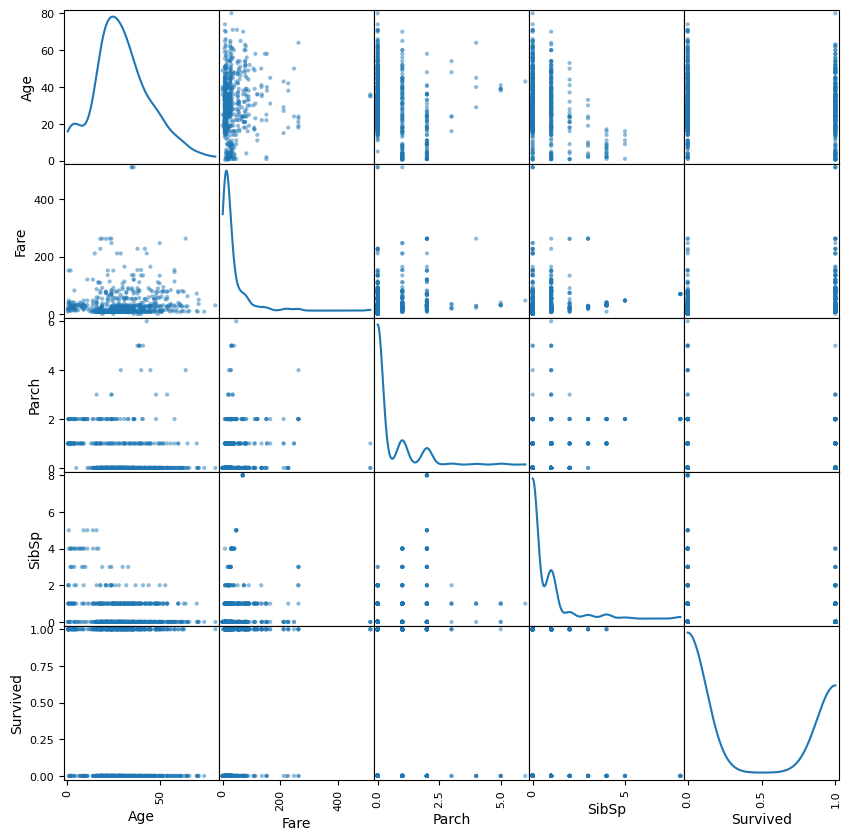

In [57]:
from pandas.plotting import scatter_matrix

scatter_matrix(df[["Age", "Fare", "Parch", "SibSp", "Survived"]], figsize=(10, 10), diagonal="kde")
plt.show()


✅ Hangi Yöntemi Seçmeliyim?

Eğer veriyi genel olarak anlamak istiyorsan: scatter_matrix()
Daha ayrıntılı bir analiz ve kategorik renk kodlaması istiyorsan: pairplot(hue="Survived") daha faydalı olur.

Genel Sonuç:  
✔ Kategorik değişkenleri analiz etmek için value_counts() ve countplot() kullanılır.

✔ İki kategorik değişkenin ilişkisini incelemek için pd.crosstab() ve bar plot önerilir.

✔ Sayısal değişkenler arasındaki ilişkileri anlamak için scatter_matrix() veya pairplot() tercih edilir.

# **EKSTRA**

# Titanic Veri Seti İçin Otomatik EDA Raporu (pandas-profiling ile)
Otomatik olarak Keşifsel Veri Analizi (EDA) raporu oluşturmak için pandas-profiling kütüphanesini kullanabilirsin. Bu rapor, veri setindeki eksik verileri, dağılımları, korelasyonları ve aykırı değerleri görselleştirerek analiz sürecini hızlandırır.

Adım 1: Gerekli Kütüphaneleri Yükleyin
Öncelikle pandas-profiling kütüphanesinin yüklü olup olmadığını kontrol edin.

Eğer yüklü değilse, şu komutu çalıştırarak yükleyebilirsiniz:

In [ ]:
!pip install pandas-profiling


Alternatif olarak, Google Colab kullanıyorsanız yeni sürümünü yüklemek için şu komutu kullanabilirsiniz:


In [59]:
!pip install -U pandas-profiling


# 📌 Adım 2: Profil Raporunu Oluşturun
Titanic veri seti için pandas-profiling ile detaylı bir analiz raporu oluşturun:

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport

# Titanic veri setini yükleyelim
df = pd.read_csv("/content/drive/MyDrive/Titanic-Dataset.csv")

# Profil raporunu oluştur
profile = ProfileReport(df, title="Titanic Veri Seti Keşifsel Veri Analizi", explorative=True)

# Raporu görüntüle
profile.to_notebook_iframe()


AttributeError: module 'numba' has no attribute 'generated_jit'